---
---
>>>>>>>>> # بِسْمِ اللَّهِ الرَّحْمَنِ الرَّحِيم
---
---

# **<u>Master's Thesis</u>**
> - **Date:** *2023.10.10*
> - **Version:** *3.1*
>> - **Prepared by** *Shama Satter*
>> - **Supervised by** *KDK*

# **<u>Initialize Cloud-AI Engine</u>**
> Selected Python version: 3.9.13
>> To access the command line: `py -3.9 -m pip ...`
>>> - Upgrade pip: `py -3.9 -m pip install --upgrade pip`
>>> - Install TensorFlow-GPU (version <2.10): `py -3.9 -m pip install "tensorflow-gpu<2.10"`
>>> - Install TensorFlow Addons (version 0.19.0): `py -3.9 -m pip install tensorflow-addons==0.19.0` [GitHub link](https://github.com/tensorflow/addons)


>>> Install/Verify Packages

In [1]:



# %pip install --user --upgrade pandas
# %pip install --user --upgrade "sqlalchemy<2.0"
# %pip install --user --upgrade mariadb
# %pip install --user --upgrade -U matplotlib
# %pip install --user openpyxl
# %pip install --user xlrd
# %pip install --user joblib

>>> <b><u>Random Forest with Tree Selection Monte Carlo Based (RF-TSMC)</u></b> [link](https://pypi.org/project/random-forest-mc/)
>>>> This project is about use Random Forest approach for multiclass classification using a dynamic tree selection Monte Carlo based. The first implementation is found in [2] (using Common Lisp).
>>>>> This version of Random Forest makes the selection of trees based on indirect optimization via Monte Carlo simulations. Highly robust against unbalance between classes and missing data (for training and prediction). Optimized for training in parallel processing. Merge native between separate trained models, with simple merge or optimized; thus new models can be mixed with old models generating mixed models (mixing of decision trees), reducing possible new data vieses. This model is highly recommended for EDAs, because it offers a high degree of explainability for PoCs, as it has an excellent relationship between generalization and cost of training and maintenance. Already validated in production, with real data, for churn prediction, with data in the form of time series. In addition, it is excellent for studying Python, because the model is 100% Python code, using some of the most pytonic features! Inspect the code and enjoy!

In [2]:
# %pip install --user -U scikit-learn
# %pip install --user xgboost
# %pip install --user catboost
# %pip install --user lightgbm
# %pip install --user random-forest-mc
# %pip install --user statsmodels
# %pip install --user tsfel

>>> Import Libraries

In [3]:
import os
import sys
import numpy as np
import pandas as pd
import sqlalchemy
import mariadb
from matplotlib import pyplot as plt

import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
import pickle

import tensorflow as tf
from keras import backend
from keras.models import Model, load_model
from keras.layers import Input, Dense, LSTM, Bidirectional, GRU, Conv1D
from keras.layers import Concatenate, Dropout, BatchNormalization, Reshape, Flatten
from keras.layers import MaxPooling1D, GlobalMaxPooling1D, GlobalAveragePooling1D
from tensorflow_addons.layers import MultiHeadAttention
from keras.utils.vis_utils import plot_model

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from math import sqrt

from joblib import dump, load

from collections import defaultdict
from copy import deepcopy
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [4]:
from   sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import random
import statsmodels.regression
from   warnings import filterwarnings
import lightgbm as ltb
from   sklearn import metrics
import catboost as cab
from   IPython.display import clear_output

# __<u>Configure Simulation Setup</u>__

>>> Define `data, model and figure` directory

In [5]:
version             = '3.1'
bigFileDirectory    = '../BigFile/'
rawDataDirectory    = 'Data/Raw/'
dataDirectory       = 'Data/V' +version+ '/'
modelDirectory      = 'Model/V' +version+ '/'
figureDirectory     = 'Figure/V' +version+ '/'

# create bigDataDirectory directory if it doesn't exist
if not os.path.exists(bigFileDirectory):
    os.makedirs(bigFileDirectory)
    print(f"System has created \"{bigFileDirectory}\" directory.")
else:
    print(f"The directory \"{bigFileDirectory}\" already exists.")

# create rawDataDirectory directory if it doesn't exist
if not os.path.exists(rawDataDirectory):
    os.makedirs(rawDataDirectory)
    print(f"System has created \"{rawDataDirectory}\" directory.")
else:
    print(f"The directory \"{rawDataDirectory}\" already exists.")

# create dataDirectory directory if it doesn't exist
if not os.path.exists(dataDirectory):
    os.makedirs(dataDirectory)
    print(f"System has created \"{dataDirectory}\" directory.")
else:
    print(f"The directory \"{dataDirectory}\" already exists.")

# create modelDirectory directory if it doesn't exist
if not os.path.exists(modelDirectory):
    os.makedirs(modelDirectory)
    print(f"System has created \"{modelDirectory}\" directory.")
else:
    print(f"The directory \"{modelDirectory}\" already exists.")


# create figureDirectory directory if it doesn't exist
if not os.path.exists(figureDirectory):
    os.makedirs(figureDirectory)
    print(f"System has created \"{figureDirectory}\" directory.")
else:
    print(f"The directory \"{figureDirectory}\" already exists.")

The directory "../BigFile/" already exists.
The directory "Data/Raw/" already exists.
The directory "Data/V3.1/" already exists.
The directory "Model/V3.1/" already exists.
The directory "Figure/V3.1/" already exists.


>>> Define columns and rows of pandas output

In [6]:
# pd.set_option('display.max_columns', 50)
# pd.set_option('display.max_rows', 30)

>>> <u>GPU Configuration for AI Model Running</u>
>>>> To optimize GPU utilization for AI models, we have considered the following options:
>>>> 1. Limiting GPU Memory Growth [TensorFlow Guide](https://www.tensorflow.org/guide/gpu#limiting_gpu_memory_growth)
>>>> 2. Utilizing Multiple GPUs [TensorFlow Guide](https://www.tensorflow.org/guide/gpu#using_multiple_gpus)
>>>> 3. Running on a Single GPU in a Multi-GPU System [TensorFlow Guide](https://www.tensorflow.org/guide/gpu#using_a_single_gpu_on_a_multi-gpu_system)


In [7]:
### Limiting GPU memory growth
gpus = tf.config.list_physical_devices('GPU')
print('Available Physical GPUs=>'+str(gpus))
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print('Configured Logical GPUs=>'+str(logical_gpus))
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

Available Physical GPUs=>[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Configured Logical GPUs=>[LogicalDevice(name='/device:GPU:0', device_type='GPU')]


>>> Specify the GPU that will be used for model execution

In [8]:
selectGPU   = 0
selectedGPU ='/device:GPU:'+ str(selectGPU)
selectedGPU

'/device:GPU:0'

# __<u>Data Preprocessing & Analysis</u>__

> ## <u>Creating DataFrame from the `.csv` files in the `Data\Raw\` directory </u>
>> We load individual DataFrame considering only `BE` or `Before Eating`

In [9]:
import pandas as pd
import os
import re

# Directory path
path = 'Data/Raw/'

# Counter for dataframe naming
df_counter = 1

# Iterate through each csv file in the directory
for file in sorted(os.listdir(path)):
    if file.endswith('.csv') and "BE" in file:
        # Extract details using regex
        match = re.match(r'(\d{4}.\d{2}.\d{2})-(\w+)-(\w+)-(\d+)mgdL.csv', file)

        if match:
            date, subject, meal_status, glucose_level = match.groups()

            # Read csv into dataframe
            df = pd.read_csv(os.path.join(path, file))

            # Rename the first three columns
            columns = df.columns.tolist()
            rename_dict = {columns[0]: "R", columns[1]: "G", columns[2]: "B"}
            df.rename(columns=rename_dict, inplace=True)

            # Drop the unwanted columns
            df.drop(columns=columns[3:6], inplace=True)

            # Add extracted columns to dataframe
            df['Date'] = date
            df['Subject Name'] = subject
            df['Meal Status'] = meal_status
            df['Glucose Level (mg/dL)'] = int(glucose_level)

            # Reorder columns
            cols_order = ['Date', 'Subject Name', 'Meal Status', 'Glucose Level (mg/dL)', 'R', 'G', 'B']
            df = df[cols_order]

            # Assign to global variable dynamically
            globals()[f'df_{df_counter}'] = df
            df_counter += 1

# After processing all files, print the summary
print(f"{df_counter - 1} dataframes were prepared, named from df_1 to df_{df_counter - 1}.")

25 dataframes were prepared, named from df_1 to df_25.


In [10]:
# Assuming df_counter holds the number of main dataframes created in the previous code

window_size = 24 * 30  # 30 seconds interval

# Loop through each main dataframe
for i in range(1, df_counter):
    main_df = globals()[f'df_{i}']
    num_windows = int(len(main_df) / window_size)
    
    # Loop to create sub-dataframes
    for j in range(num_windows):
        start_idx   = j * window_size
        end_idx     = start_idx + window_size
        
        sub_df      = main_df.iloc[start_idx:end_idx]
        
        # Assign the sub dataframe to a dynamic global variable
        globals()[f'df_{i}_{j+1}'] = sub_df
        
        # Print the range of indices for the sub-dataframe
        # print(f'df_{i}_{j+1} range in df_{i}: {start_idx} to {end_idx - 1}')  # -1 to get the last index in the window

        print(f'df_{i}_{j+1}')  # -1 to get the last index in the window

# After this loop, you'll have dataframes named df_1_1, df_1_2,..., df_2_1, df_2_2, and so on. You'll also have printed out the range of indices from the main df_X for each sub-dataframe.

df_1_1
df_1_2
df_1_3
df_1_4
df_1_5
df_1_6
df_1_7
df_1_8
df_1_9
df_1_10
df_2_1
df_2_2
df_2_3
df_2_4
df_2_5
df_2_6
df_2_7
df_3_1
df_3_2
df_3_3
df_3_4
df_3_5
df_3_6
df_3_7
df_3_8
df_3_9
df_3_10
df_4_1
df_4_2
df_4_3
df_4_4
df_4_5
df_4_6
df_4_7
df_4_8
df_5_1
df_5_2
df_5_3
df_5_4
df_5_5
df_5_6
df_5_7
df_5_8
df_5_9
df_5_10
df_5_11
df_5_12
df_6_1
df_6_2
df_6_3
df_6_4
df_6_5
df_6_6
df_6_7
df_6_8
df_6_9
df_6_10
df_6_11
df_7_1
df_7_2
df_7_3
df_7_4
df_7_5
df_7_6
df_7_7
df_7_8
df_7_9
df_7_10
df_7_11
df_7_12
df_7_13
df_8_1
df_8_2
df_8_3
df_8_4
df_8_5
df_8_6
df_8_7
df_8_8
df_8_9
df_8_10
df_8_11
df_8_12
df_9_1
df_9_2
df_9_3
df_9_4
df_9_5
df_9_6
df_9_7
df_9_8
df_9_9
df_9_10
df_9_11
df_9_12
df_9_13
df_10_1
df_10_2
df_10_3
df_10_4
df_10_5
df_10_6
df_10_7
df_10_8
df_10_9
df_10_10
df_10_11
df_10_12
df_11_1
df_11_2
df_11_3
df_11_4
df_11_5
df_11_6
df_11_7
df_11_8
df_11_9
df_11_10
df_11_11
df_12_1
df_12_2
df_12_3
df_12_4
df_12_5
df_12_6
df_12_7
df_12_8
df_12_9
df_12_10
df_12_11
df_12_12
df_13_1
df_13_2
df_13_

In [11]:
import numpy as np

# Determine the highest index for which the corresponding DataFrame exists
highest_index_x = 1
highest_index_y = 1

while True:
    if f'df_{highest_index_x}_{highest_index_y}' in globals():
        highest_index_y += 1
    else:
        if highest_index_y == 1:
            break
        highest_index_x += 1
        highest_index_y = 1

highest_index_x -= 1  # Adjust since we added 1 extra in the loop

# For each primary index (x), collect all secondary indexed DataFrames (y) into a list
# Then, process that list to produce a combined numpy array which is saved as subject_x
for x in range(1, highest_index_x + 1):
    dfs = []
    y = 1
    while True:
        df_name = f'df_{x}_{y}'
        if df_name in globals():
            dfs.append(globals()[df_name])
            y += 1
        else:
            break

    # Ensure that all dfs have at least the length of dfs[0]
    dfs = [df for df in dfs if len(df) >= len(dfs[0])]

    # Remove specified columns and convert to NumPy arrays
    np_arrays = [df.drop(['Date', 'Subject Name', 'Meal Status'], axis=1).to_numpy() for df in dfs]

    # Combine the NumPy arrays along a new axis
    globals()[f'subject_{x}'] = np.stack(np_arrays)

    # Print the resulting combined NumPy array shape
    print(f"subject_{x}.shape:", globals()[f'subject_{x}'].shape)


subject_1.shape: (10, 720, 4)
subject_2.shape: (7, 720, 4)
subject_3.shape: (10, 720, 4)
subject_4.shape: (8, 720, 4)
subject_5.shape: (12, 720, 4)
subject_6.shape: (11, 720, 4)
subject_7.shape: (13, 720, 4)
subject_8.shape: (12, 720, 4)
subject_9.shape: (13, 720, 4)
subject_10.shape: (12, 720, 4)
subject_11.shape: (11, 720, 4)
subject_12.shape: (12, 720, 4)
subject_13.shape: (12, 720, 4)
subject_14.shape: (11, 720, 4)
subject_15.shape: (11, 720, 4)
subject_16.shape: (11, 720, 4)
subject_17.shape: (12, 720, 4)
subject_18.shape: (14, 720, 4)
subject_19.shape: (6, 720, 4)
subject_20.shape: (7, 720, 4)
subject_21.shape: (7, 720, 4)
subject_22.shape: (7, 720, 4)
subject_23.shape: (7, 720, 4)
subject_24.shape: (7, 720, 4)
subject_25.shape: (7, 720, 4)


In [12]:
# List to store all subjects' arrays
all_subjects = []

# Determine the minimum x across all subjects
min_x = float('inf')
for x in range(1, highest_index_x + 1):
    subject_name = f'subject_{x}'
    if subject_name in globals():
        current_subject = globals()[subject_name]
        min_x = min(min_x, current_subject.shape[0])
        all_subjects.append(current_subject)

# Truncate each subject's array to have min_x as its first dimension
all_subjects = [subject[:min_x] for subject in all_subjects]

# Re-arrange the subjects as per the desired sequence
combined_list = []
for i in range(min_x):
    for subject in all_subjects:
        combined_list.append(subject[i])

# Convert the list of arrays into a single three-dimensional array
combined_subjects_array = np.stack(combined_list, axis=0)

# Print the shape of the combined array
print(combined_subjects_array.shape)

(150, 720, 4)


# __<u>Feature Extraction from PPG</u>__

>> **Note:**
>>   * <u>Summary of the Pre-processed data</u>
>>      * **Sampling Rate**: `24`
>>      * **Duration Test**: `30 sec`
>>      * **CBG (mg / dl)**: `capillary blood glucose`

>> <b><u>Algorithm-01:</b> process_signal </u>

In [13]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
import pandas as pd

def process_signal(PPGnpArray, showFigure=False):
    """
    Process and filter Photoplethysmogram (PPG) signals to remove noise, baseline drift, and extract clean PPG components.

    Args:
        PPGnpArray (numpy.ndarray): A 2D numpy array containing PPG data with columns for time and three color channels (e.g., red, green, and blue).
        showFigure (bool, optional): If True, visualize the signal processing steps using matplotlib. Default is False.

    Returns:
        tuple: A tuple containing the final processed PPG signals for red, green, and blue channels after noise removal and baseline correction.

    The function applies a series of signal processing steps to the input PPG data:
    1. Low-pass filtering to remove high-frequency noise.
    2. Polynomial detrending to remove baseline drift.
    3. High-pass filtering to further remove low-frequency drift.
    4. Visualization of the signal processing steps if showFigure is set to True.

    The cleaned PPG signals for each color channel are returned in a tuple.
    """
    
    # Define the filter parameters
    fs          = 24  # sampling frequency
    low_cutoff  = 3.0  # 3.0 to 4.0
    high_cutoff = 0.15 # e.g., 0.5 Hz to remove drifts slower than 2 seconds

    # Create the low-pass filter
    sos_low = scipy.signal.butter(N=2, Wn=low_cutoff, btype='low', fs=fs, output='sos')
    # Create the high-pass filter
    sos_high = scipy.signal.butter(N=2, Wn=high_cutoff, btype='high', fs=fs, output='sos')

    # Extract the PPG data
    rs = PPGnpArray[:, 1]
    gs = PPGnpArray[:, 2]
    bs = PPGnpArray[:, 3]

    # Define a function to remove baseline drift using polynomial fitting
    def polynomial_detrend(data, degree=3):
        x = np.arange(len(data))
        fit = np.polyfit(x, data, degree)
        baseline = np.polyval(fit, x)
        return (data - baseline)

    # Remove baseline drift using polynomial fitting
    rs_detrended = polynomial_detrend(rs)
    gs_detrended = polynomial_detrend(gs)
    bs_detrended = polynomial_detrend(bs)

    # Filter the detrended data using low-pass filter
    rs_filtered = scipy.signal.sosfilt(sos_low, rs_detrended)
    gs_filtered = scipy.signal.sosfilt(sos_low, gs_detrended)
    bs_filtered = scipy.signal.sosfilt(sos_low, bs_detrended)

    # Remove baseline drift from filtered data using high-pass filter
    rs_final = scipy.signal.sosfilt(sos_high, rs_filtered) + np.mean(rs)
    gs_final = scipy.signal.sosfilt(sos_high, gs_filtered) + np.mean(gs)
    bs_final = scipy.signal.sosfilt(sos_high, bs_filtered) + np.mean(bs)

    # Visualization
    if showFigure:
        base_colors = ['red', 'green', 'blue']
        alphas = [0.25, 0.5, 0.75, 1]
        labels = ['Original', 'Detrended', 'Filtered', 'Final Processed']
        titles = ['Red', 'Green', 'Blue']
        signals = [(rs, rs_detrended + np.mean(rs), rs_filtered + np.mean(rs), rs_final), 
                   (gs, gs_detrended + np.mean(gs), gs_filtered + np.mean(gs), gs_final), 
                   (bs, bs_detrended + np.mean(bs), bs_filtered + np.mean(bs), bs_final)]
        
        for base_color, title, signal in zip(base_colors, titles, signals):
            print(f'***************{title}**************')
            plt.rcParams.update(plt.rcParamsDefault)
            plt.rcParams['font.size'] = '9'
            fig, axs = plt.subplots(4, figsize=(18, 8))
            
            for ax, sig, alpha, label in zip(axs, signal, alphas, labels):
                ax.plot(pd.DataFrame(sig), color=base_color, alpha=alpha, label=label)
                ax.grid(True)
                ax.legend(loc=1)
            
            axs[0].set(title='Original PPG Signal', ylabel=' ', xlabel=' ')
            axs[1].set(title='After Baseline Drift Removal using Polynomial Detrending', ylabel=' ', xlabel=' ')
            axs[2].set(title='After Filtering the Detrended Signal using Butterworth Filter', ylabel=' ', xlabel=' ')
            axs[3].set(title='After Removing Baseline Drift from Filtered Signal using High-pass Filter', ylabel=' ', xlabel=' ')
            
            plt.tight_layout()
            plt.show()

    return rs_final, gs_final, bs_final

In [14]:
def determine_ac_dc_from_PPG (Signal, colorSignal, showFigure='False'):

    """
    Analyze AC (Alternating Current) and DC (Direct Current) characteristics in a Photoplethysmogram (PPG) signal.

    Args:
        Signal (numpy.ndarray): The PPG signal to analyze.
        colorSignal (str): The color for plotting the PPG signal.
        showFigure (bool, optional): If True, display a visualization of the AC and DC analysis. Default is False.

    Returns:
        tuple: A tuple containing the AC signal amplitude and DC offset.

    This function analyzes a PPG signal to determine its AC and DC components:
    - AC represents the pulsatile component, typically related to heart rate.
    - DC represents the baseline or constant component.

    The function identifies peaks and valleys in the PPG signal and calculates AC and DC values based on these components.
    It also provides an option to visualize the analysis results if `showFigure` is set to True.
    """
    
    maxArray = []
    minArray = []
    p2pPanDF = pd.DataFrame({'index':[], 'value':[]})
    midValue = np.mean(Signal)
    maxValue = midValue
    minValue = midValue
    maxIndex = 0
    minIndex = 0

    for i in range(len(Signal)):
        nowValue = Signal[i]
        if (nowValue>midValue):
            if (minValue<midValue and minIndex>0):
                p2pPanDF = pd.concat([p2pPanDF, pd.DataFrame({'index':[minIndex], 'value':[minValue]})], ignore_index=True, sort=False)
                minArray = np.append(minArray, minValue)
                minValue = midValue
            if (nowValue>maxValue):
                maxValue = nowValue
                maxIndex = i
        if (nowValue<midValue):
            if (maxValue>midValue and maxIndex>0):
                p2pPanDF = pd.concat([p2pPanDF, pd.DataFrame({'index':[maxIndex], 'value':[maxValue]})], ignore_index=True, sort=False)
                maxArray = np.append(maxArray, maxValue)
                maxValue = midValue
            if (nowValue<minValue):
                minValue = nowValue
                minIndex = i

    ## Calculate AC and DC
    acSignal = np.mean(maxArray) - np.mean(minArray)
    dcSignal = np.mean(minArray)

    ## Show Figure
    if (showFigure=='True'):
        plt.rcParams.update(plt.rcParamsDefault)
        plt.rcParams['font.size'] = '9'
        plt.figure(figsize=(21, 3))
        plt.title(f'***Analyze AC and DC Characteristics in a PPG Signal*** \n AC={acSignal} and DC={dcSignal} \n Total Peaks={len(maxArray)}(mean={np.mean(maxArray)}) and Valley={len(minArray)}(mean={np.mean(minArray)})', y=1, loc='center')
        plt.xlabel('Sample Count')
        plt.ylabel(' ')
        for i in range(len(Signal)):
            plt.plot(i, midValue,          '.', color='k')
            plt.plot(i, np.mean(maxArray), '.', color='m')
            plt.plot(i, np.mean(minArray), '.', color='y')
        plt.plot(Signal, color=f'{colorSignal}')
        plt.plot(p2pPanDF.values[:,0], p2pPanDF.values[:,1], 'x', color='k')
        plt.grid(True)
        plt.show()

    #return acSignal, dcSignal, maxArray,minArray,p2pPanDF
    return acSignal, dcSignal

In [15]:
def compute_kaiser_teager_energy(signal):
    """
    Compute the Kaiser-Teager energy of a given signal.

    Parameters:
    - signal: 1D numpy array or list

    Returns:
    - 1D numpy array of Kaiser-Teager energy values

    The Kaiser-Teager energy is a measure of the signal's energy that emphasizes significant variations and can be used for feature extraction.

    """
    # Ensure the input is a numpy array
    signal = np.array(signal)

    # Check if the signal is long enough to compute the energy
    if len(signal) < 3:
        raise ValueError("Signal length must be at least 3 to compute Kaiser-Teager energy.")
    
    # Compute the energy using the formula
    energy_values = signal[1:-1]**2 - signal[:-2] * signal[2:]
    
    # The first and last energy values are not well-defined by the above formula.
    # One common approach is to duplicate the energy values from the adjacent samples.
    kte_values = np.concatenate(([energy_values[0]], energy_values, [energy_values[-1]]))

    return kte_values

In [16]:
# Importing necessary modules
import numpy as np
import statsmodels.regression
import tsfel
import scipy.signal
import scipy.stats

def get_channel_features(signal):
    """
    Extract a set of features from a given signal.
    
    Parameters:
    - signal: array-like
        The input signal from which features are extracted.
    
    Returns:
    - combined_features: array-like
        An array containing the extracted features.

    The function applies a series of signal processing steps to the input data:
    1. Zero-centering the signal to remove the mean offset.
    2. Yule-Walker linear prediction to derive coefficients.
    3. Calculation of various time-domain features like zero crossings, skewness, and sum of absolute differences.
    4. Calculation of spectral features like spectral kurtosis and skewness using a window of 24.
    5. Compute the Power Spectral Density (PSD) of the signal.
    6. Extract statistics from the PSD such as its kurtosis, mean, and variance.
    7. Calculate Kaiser-Teager energy statistics.
    """

    # Zero-centering the signal
    zcSignal = signal - np.mean(signal)

    # Calculate Yule-Walker coefficients for the zero-centered signal
    yule_walker_coeffs, _ = statsmodels.regression.linear_model.yule_walker(zcSignal, order=2)
    
    # Calculate the number of zero-crossings in the signal
    zero_cross_count = tsfel.feature_extraction.features.zero_cross(zcSignal)
    
    # Calculate the skewness of the signal
    signal_skewness = tsfel.feature_extraction.features.skewness(zcSignal)
    
    # Calculate the mean amplitude of wavelet coefficients
    mean_wavelet_amplitude = np.mean(tsfel.feature_extraction.wavelet_abs_mean(zcSignal))
    
    # Calculate the autocorrelation of the signal
    signal_autocorrelation = tsfel.feature_extraction.autocorr(zcSignal)
    
    # Calculate the spectral kurtosis of the signal
    spectral_kurtosis_value = tsfel.feature_extraction.features.spectral_kurtosis(zcSignal, 24)
    
    # Calculate the spectral skewness of the signal
    spectral_skewness_value = tsfel.feature_extraction.features.spectral_skewness(zcSignal, 24)
    
    # Calculate the sum of absolute differences of the signal
    sum_absolute_difference = tsfel.feature_extraction.features.sum_abs_diff(zcSignal)
    
    # Compute the Power Spectral Density (PSD) of the signal using the Welch method
    frequency, power_spectral_density = scipy.signal.welch(zcSignal, nperseg=len(zcSignal))
    
    # Calculate the kurtosis of the PSD
    psd_kurtosis = scipy.stats.kurtosis(power_spectral_density)
    
    # Calculate the mean of the PSD
    psd_mean = np.mean(power_spectral_density)
    
    # Calculate the variance of the PSD
    psd_variance = np.var(power_spectral_density)
    
    # Compute the Kaiser-Teager energy for the zero-centered signal (assuming compute_kaiser_teager_energy is defined elsewhere)
    kaiser_teager_energy_values = compute_kaiser_teager_energy(zcSignal)
    
    # Calculate the skewness of the Kaiser-Teager energy values
    kte_skewness = scipy.stats.skew(kaiser_teager_energy_values)
    
    # Calculate the kurtosis of the Kaiser-Teager energy values
    kte_kurtosis = scipy.stats.kurtosis(kaiser_teager_energy_values)
    
    # Calculate the mean of the Kaiser-Teager energy values
    kte_mean = np.mean(kaiser_teager_energy_values)
    
    # Calculate the variance of the Kaiser-Teager energy values
    kte_variance = np.var(kaiser_teager_energy_values)
    
    # Combine all extracted features into a single array
    combined_features = np.hstack((
        yule_walker_coeffs,
        zero_cross_count,
        signal_skewness,
        mean_wavelet_amplitude,
        signal_autocorrelation,
        spectral_kurtosis_value,
        spectral_skewness_value,
        sum_absolute_difference,
        psd_kurtosis,
        psd_mean,
        psd_variance,
        kte_skewness,
        kte_kurtosis,
        kte_mean,
        kte_variance
    ))

    return combined_features

samples_prepared  = combined_subjects_array.shape[0]

# npCombinedDataSet = np.empty([samples_prepared, 0])
for i in range (samples_prepared):
    # Process and filter Photoplethysmogram (PPG) signals to remove noise, baseline drift, and extract clean PPG components.
    r,g,b       = process_signal(combined_subjects_array[i])

    # Analyze AC (Alternating Current) and DC (Direct Current) characteristics in a Photoplethysmogram (PPG) signal
    r_ac,r_dc   = determine_ac_dc_from_PPG(r, colorSignal='r',showFigure='False')
    g_ac,g_dc   = determine_ac_dc_from_PPG(g, colorSignal='g',showFigure='False')
    b_ac,b_dc   = determine_ac_dc_from_PPG(b, colorSignal='b',showFigure='False')

    r1 = (g_ac/g_dc)/(r_ac/r_dc)
    r2 = (b_ac/b_dc)/(r_ac/r_dc)
    r3 = (g_ac/g_dc)/(b_ac/b_dc)
    r4 = (g_ac/g_dc)
    r5 = (b_ac/b_dc)
    r6 = (r_ac/r_dc)


    #  Extract a set of features from rgb channels. 
    """
    yule_walker_coeffs,
    zero_cross_count,
    signal_skewness,
    mean_wavelet_amplitude,
    signal_autocorrelation,
    spectral_kurtosis_value,
    spectral_skewness_value,
    sum_absolute_difference,
    psd_kurtosis,
    psd_mean,
    psd_variance,
    kte_skewness,
    kte_kurtosis,
    kte_mean,
    kte_variance
    """
    r_features = get_channel_features(r)
    g_features = get_channel_features(g)
    b_features = get_channel_features(b)


    # Creating Features set
    extracted_features = np.hstack((r1, r2, r3, r4, r5, r6, r_features, g_features, b_features))

    # Target
    target = np.mean(combined_subjects_array[i,:,0])

    # Dataset
    npDataSet = np.hstack((extracted_features, target))

    # Combined Dataset
    if i == 0:
        j = len(npDataSet)
        npCombinedDataSet = np.empty([samples_prepared, j])
    npCombinedDataSet[i][:j] = npDataSet

    # Checking outputs
    print(f'iCount={i} || jCount={j}')
    print(npDataSet)

In [18]:
# npCombinedDataSet[117]

In [19]:
npCombinedDataSet.shape

(150, 55)

In [20]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming npCombinedDataSet is already defined with shape (118, 55)

# Scale all data
scaler = StandardScaler()
npCombinedDataSet_scaled = scaler.fit_transform(npCombinedDataSet)

# Saving the scaler for future use
# modelDirectory = "your_model_directory_path_here"  # Set this to your model directory path
dump(scaler, f'{modelDirectory}npCombinedDataSet_scaled.joblib')

# Define the split ratio
split_ratio = 0.85

# Calculate the number of samples for training
num_train_samples = int(split_ratio * npCombinedDataSet_scaled.shape[0])
num_train_samples = 125

# Split the data using the computed number of samples for training
X_train = npCombinedDataSet_scaled[:num_train_samples, :-1]
X_test  = npCombinedDataSet_scaled[num_train_samples:, :-1]
y_train = npCombinedDataSet_scaled[:num_train_samples, -1:]
y_test  = npCombinedDataSet_scaled[num_train_samples:, -1:]

In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(125, 54)
(125, 1)
(25, 54)
(25, 1)


In [22]:
X_train

array([[-0.25794857,  0.27650906, -0.86725159, ..., -0.24519977,
         3.92062164,  4.77155734],
       [ 0.86621134, -0.20790129,  1.62309002, ..., -0.20714418,
        -0.40884538, -0.31193531],
       [-0.88006123, -0.30148936, -0.92690264, ..., -0.25594519,
        -0.39660209, -0.31272653],
       ...,
       [-0.71716223, -0.74332055,  0.14147002, ..., -0.3080981 ,
        -0.21129971, -0.29362581],
       [-2.5734351 , -1.9087716 , -1.14003222, ...,  0.205151  ,
        -0.23601273, -0.29484753],
       [ 0.79420402, -0.03666748,  1.16343858, ..., -0.22930528,
        -0.35669221, -0.2964241 ]])

In [24]:
y_train

array([[ 0.72231512],
       [-0.18057878],
       [-0.18057878],
       [ 0.72231512],
       [ 1.77569133],
       [ 0.42135049],
       [ 0.5718328 ],
       [-2.28733121],
       [ 1.4747267 ],
       [-0.3310611 ],
       [ 0.27086817],
       [-0.48154341],
       [-1.38443731],
       [ 1.4747267 ],
       [-0.3310611 ],
       [-0.18057878],
       [-1.53491963],
       [ 0.12038585],
       [ 0.72231512],
       [-0.18057878],
       [ 1.02327975],
       [ 0.72231512],
       [-0.48154341],
       [-0.78250805],
       [-1.68540194],
       [ 0.72231512],
       [-0.18057878],
       [-0.18057878],
       [ 0.72231512],
       [ 1.77569133],
       [ 0.42135049],
       [ 0.5718328 ],
       [-2.28733121],
       [ 1.4747267 ],
       [-0.3310611 ],
       [ 0.27086817],
       [-0.48154341],
       [-1.38443731],
       [ 1.4747267 ],
       [-0.3310611 ],
       [-0.18057878],
       [-1.53491963],
       [ 0.12038585],
       [ 0.72231512],
       [-0.18057878],
       [ 1

# __<u> Training ML Models </u>__
- Leave One Out Approach
- 4 Models : `RandomForest`, `XGBoost`, `CatBoost` & `LightGBM`

In [23]:
from collections import defaultdict
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from copy import deepcopy
from joblib import dump

# Define the models to be trained
models = {
    "RandomForest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "CatBoost": CatBoostRegressor(verbose=0),
    "LightGBM": LGBMRegressor(verbose=-1, force_col_wise=True) # Suppress LightGBM messages and set force_col_wise=True
}


model_performances = defaultdict(list)
model_lists = defaultdict(list)

loo = LeaveOneOut()
num_epochs = loo.get_n_splits(X_train)

for model_name, base_model in models.items():
    mse_values_for_model = []

    for epoch, (train_idx, test_idx) in enumerate(loo.split(X_train), start=1):
        X_loo_train, X_loo_test = X_train[train_idx], X_train[test_idx]
        y_loo_train, y_loo_test = y_train[train_idx].ravel(), y_train[test_idx].ravel()  # Use ravel() here
        
        model = deepcopy(base_model)
        model.fit(X_loo_train, y_loo_train)
        
        y_loo_pred = model.predict(X_loo_test)
        mse_loo = mean_squared_error(y_loo_test, y_loo_pred)
        
        mse_values_for_model.append(mse_loo)
        model_lists[model_name].append(model)

        print(f"Training {model_name} - Epoch {epoch}/{num_epochs} - Current MSE: {mse_loo:.4f}", end="\r", flush=True)

    average_mse = sum(mse_values_for_model) / len(mse_values_for_model)
    model_performances[model_name].extend(mse_values_for_model)  # Store list of MSE values for each model
    
    print(f"\nAverage MSE for {model_name} with LOOCV: {average_mse:.4f}")
    print("-" * 50)

dump(model_performances,    f'{bigFileDirectory}model_performances.joblib')
dump(model_lists,           f'{bigFileDirectory}model_lists.joblib')

KeyboardInterrupt: 

# __<u>Innovation</u>__
- weighted_ensemble_predict

In [ ]:
model_performances  = load(f'{bigFileDirectory}model_performances.joblib')
model_lists         = load(f'{bigFileDirectory}model_lists.joblib')


def weighted_ensemble_predict(X, models, performances):
    total_weights = sum([1 / mse for mse in performances])
    predictions = np.zeros(X.shape[0])
    for model, mse in zip(models, performances):
        weight = (1 / mse) / total_weights
        predictions += weight * model.predict(X)
    return predictions


for model_type in models.keys():
    y_test_pred_ensemble = weighted_ensemble_predict(X_test, model_lists[model_type], model_performances[model_type])
    mse_ensemble = mean_squared_error(y_test, y_test_pred_ensemble)
    print(f"MSE in the Test Subjects using {model_type} ensemble: {mse_ensemble:.4f}")

MSE in the Test Subjects using RandomForest ensemble: 0.4405
MSE in the Test Subjects using XGBoost ensemble: 0.3446
MSE in the Test Subjects using CatBoost ensemble: 0.2905
MSE in the Test Subjects using LightGBM ensemble: 0.3851


In [ ]:
model_lists

defaultdict(list,
            {'RandomForest': [RandomForestRegressor(),
              RandomForestRegressor(),
              RandomForestRegressor(),
              RandomForestRegressor(),
              RandomForestRegressor(),
              RandomForestRegressor(),
              RandomForestRegressor(),
              RandomForestRegressor(),
              RandomForestRegressor(),
              RandomForestRegressor(),
              RandomForestRegressor(),
              RandomForestRegressor(),
              RandomForestRegressor(),
              RandomForestRegressor(),
              RandomForestRegressor(),
              RandomForestRegressor(),
              RandomForestRegressor(),
              RandomForestRegressor(),
              RandomForestRegressor(),
              RandomForestRegressor(),
              RandomForestRegressor(),
              RandomForestRegressor(),
              RandomForestRegressor(),
              RandomForestRegressor(),
              RandomForestRegr

In [ ]:
model_performances

defaultdict(list,
            {'RandomForest': [0.17880661231883974,
              0.7254438405797116,
              0.11979166666666671,
              1.2568500905797109,
              0.4404008152173905,
              0.18652400362318858,
              0.008152173913043355,
              5.412400362318842,
              1.2669927536231893,
              0.2318840579710145,
              0.45449275362318886,
              1.41685009057971,
              0.42065443840579675,
              1.6982699275362325,
              0.004791666666666653,
              0.003269927536231878,
              2.6904438405797113,
              0.055817481884058016,
              0.09986413043478264,
              0.0017753623188405646,
              2.135056612318842,
              0.009567481884057974,
              0.38812500000000016,
              0.11979166666666669,
              3.9876109601449277,
              0.0523188405797101,
              5.661231884058233e-05,
              0.000817481884

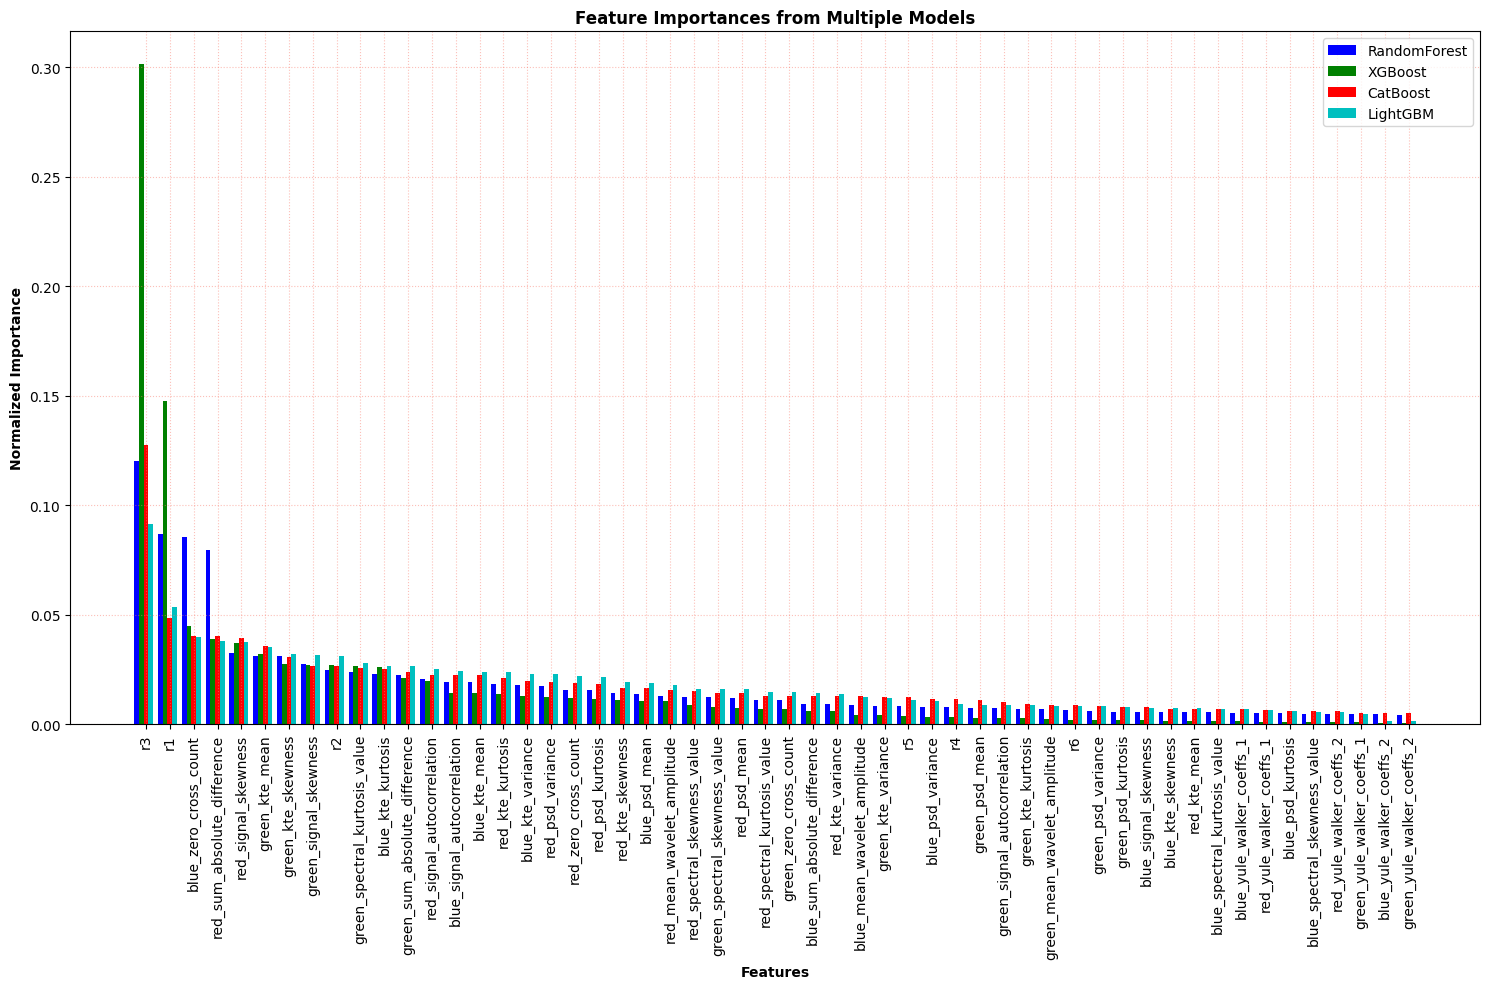

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define feature names
general_features = ['r1', 'r2', 'r3', 'r4', 'r5', 'r6']

color_features = [
    'yule_walker_coeffs_1',
    'yule_walker_coeffs_2',
    'zero_cross_count',
    'signal_skewness',
    'mean_wavelet_amplitude',
    'signal_autocorrelation',
    'spectral_kurtosis_value',
    'spectral_skewness_value',
    'sum_absolute_difference',
    'psd_kurtosis',
    'psd_mean',
    'psd_variance',
    'kte_skewness',
    'kte_kurtosis',
    'kte_mean',
    'kte_variance'
]

colors = ['red', 'green', 'blue']

feature_names = general_features + [f"{color}_{feature}" for color in colors for feature in color_features]

def get_average_importance(models, model_type):
    """ Get average feature importance across all models """
    all_importances = []
    for model in models:
        if model_type in ["RandomForest", "XGBoost", "LightGBM"]:
            all_importances.append(model.feature_importances_)
        elif model_type == "CatBoost":
            all_importances.append(model.get_feature_importance())
        else:
            raise ValueError(f"Unknown model type: {model_type}")
    return np.mean(all_importances, axis=0)

def get_overall_average_importance(importances_dict):
    """Compute the overall average importance across models."""
    importances = list(importances_dict.values())
    return np.mean(importances, axis=0)

def reorder_features_by_importance(importances, feature_names):
    """Reorder features based on their importances."""
    order = np.argsort(importances)[::-1]  # [::-1] for descending order
    reordered_importances = importances[order]
    reordered_feature_names = np.array(feature_names)[order]
    return reordered_importances, list(reordered_feature_names)

def plot_all_feature_importances(importances_dict, reordered_feature_names):
    """ Plot feature importances from multiple models on the same graph """
    n_features = len(reordered_feature_names)
    bar_width = 0.2
    model_colors = ['b', 'g', 'r', 'c', 'm']

    plt.figure(figsize=(15, 10))

    for idx, (model_type, importance) in enumerate(importances_dict.items()):
        normalized_importance = importance / np.sum(importance)
        normalized_importance = normalized_importance[np.argsort(importance)[::-1]]
        r = np.arange(n_features)
        plt.bar(r + idx*bar_width, normalized_importance, color=model_colors[idx], width=bar_width, label=model_type)

    plt.xticks(r + 2*bar_width, reordered_feature_names, rotation=90)  # Rotate x-axis labels for readability
    plt.ylabel('Normalized Importance', fontweight='bold', fontsize=10)
    plt.xlabel('Features', fontweight='bold', fontsize=10)
    plt.title('Feature Importances from Multiple Models', fontweight='bold', fontsize=12)
    plt.grid(True, linestyle='dotted', color='salmon', alpha=0.5)
    plt.legend()

    plt.tight_layout()
    plt.show()


# Fetch feature importances from the trained models:
importances_dict = {}
for model_type in models.keys():
    avg_importance = get_average_importance(model_lists[model_type], model_type)
    importances_dict[model_type] = avg_importance

# Get the overall average importance across all models
overall_avg_importance = get_overall_average_importance(importances_dict)

# Reorder features based on the overall average importance
reordered_importances, reordered_feature_names = reorder_features_by_importance(overall_avg_importance, feature_names)

# Plot reordered features
plot_all_feature_importances(importances_dict, reordered_feature_names)

# __<u>Evaluation</u>__

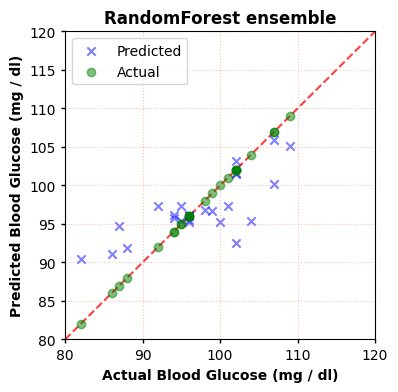

MAE in the Test Subjects using RandomForest ensemble: 3.3058
R^2 in the Test Subjects using RandomForest ensemble: 0.5595
Pearson's correlation coefficient using RandomForest ensemble: 0.7709
P-value: 0.0000
Pearson's correlation coefficient using RandomForest ensemble: 0.7709
P-value: 0.0000


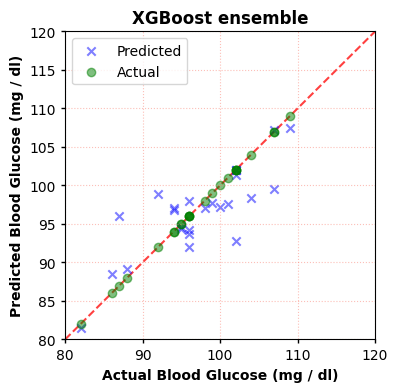

MAE in the Test Subjects using XGBoost ensemble: 2.8042
R^2 in the Test Subjects using XGBoost ensemble: 0.6554
Pearson's correlation coefficient using XGBoost ensemble: 0.8145
P-value: 0.0000
Pearson's correlation coefficient using XGBoost ensemble: 0.8145
P-value: 0.0000


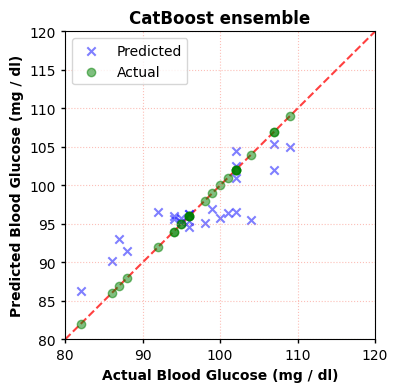

MAE in the Test Subjects using CatBoost ensemble: 2.8892
R^2 in the Test Subjects using CatBoost ensemble: 0.7095
Pearson's correlation coefficient using CatBoost ensemble: 0.8689
P-value: 0.0000
Pearson's correlation coefficient using CatBoost ensemble: 0.8689
P-value: 0.0000


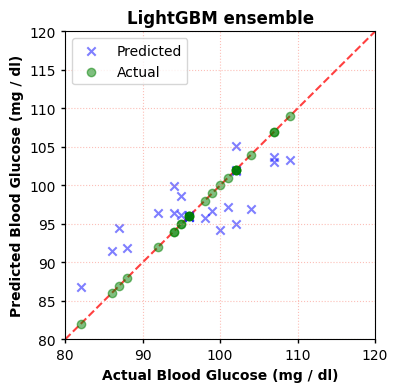

MAE in the Test Subjects using LightGBM ensemble: 3.3602
R^2 in the Test Subjects using LightGBM ensemble: 0.6149
Pearson's correlation coefficient using LightGBM ensemble: 0.8044
P-value: 0.0000
Pearson's correlation coefficient using LightGBM ensemble: 0.8044
P-value: 0.0000


In [ ]:
import numpy as np
from joblib import load

# Load the saved scaler
scaler = load(f'{modelDirectory}npCombinedDataSet_scaled.joblib')

def inverse_scale_target(scaler, y_scaled):
    # Create a dummy array with zeros with the same shape as the original dataset
    dummy = np.zeros((len(y_scaled), X_train.shape[1]+1))
    
    # Replace the last column (target values) with the scaled values
    dummy[:,-1] = y_scaled.ravel()
    
    # Use inverse_transform to scale back to the original range
    y_original = scaler.inverse_transform(dummy)[:,-1]
    
    return y_original


for model_type in models.keys():
    y_test_pred_ensemble = weighted_ensemble_predict(X_test, model_lists[model_type], model_performances[model_type])
    
    # Convert the scaled predicted and actual values to their original values
    y_test_original                 = inverse_scale_target(scaler, y_test)
    y_test_pred_ensemble_original   = inverse_scale_target(scaler, y_test_pred_ensemble)
    
    # Scatter plot
    plt.figure(figsize=(4, 4), dpi=100)
    plt.xlim(80, 120)
    plt.ylim(80, 120) 
    plt.scatter(y_test_original, y_test_pred_ensemble_original, alpha=0.5, color='b', label='Predicted', marker='x')
    plt.scatter(y_test_original, y_test_original, alpha=0.5, color='g', label='Actual', marker='o')
    
    # 45-degree line
    lims = [
        np.min([plt.xlim(), plt.ylim()]),  # min of both axes
        np.max([plt.xlim(), plt.ylim()]),  # max of both axes
    ]
    plt.plot(lims, lims, '--', alpha=0.75, zorder=0, color='r')
    plt.xlim(lims)
    plt.ylim(lims)

    plt.xlabel('Actual Blood Glucose (mg / dl)', fontweight='bold', fontsize=10)
    plt.ylabel('Predicted Blood Glucose (mg / dl)', fontweight='bold', fontsize=10)
    plt.title(f'{model_type} ensemble', fontweight='bold', fontsize=12)
    plt.grid(True, linestyle='dotted', color='salmon', alpha=0.5)
    plt.tick_params(axis='x', labelsize=10, width=1, length=3, direction='out')
    plt.tick_params(axis='y', labelsize=10, width=1, length=3, direction='out')
    plt.legend()
    plt.show()

    mse_ensemble    = mean_squared_error(y_test_original, y_test_pred_ensemble_original)
    mae_ensemble    = mean_absolute_error(y_test_original, y_test_pred_ensemble_original)
    r2              = r2_score(y_test_original, y_test_pred_ensemble_original)
    
    # print(f"MSE in the Test Subjects using {model_type} ensemble: {mse_ensemble:.4f}")
    print(f"MAE in the Test Subjects using {model_type} ensemble: {mae_ensemble:.4f}")
    print(f"R^2 in the Test Subjects using {model_type} ensemble: {r2:.4f}")
    pearson_coefficient, p_value = pearsonr(y_test_original, y_test_pred_ensemble_original)
    print(f"Pearson's correlation coefficient using {model_type} ensemble: {pearson_coefficient:.4f}")
    print(f"P-value: {p_value:.4f}")
    pearson_coefficient, p_value = pearsonr(y_test_original, y_test_pred_ensemble_original)
    print(f"Pearson's correlation coefficient using {model_type} ensemble: {pearson_coefficient:.4f}")
    print(f"P-value: {p_value:.4f}")
